In [72]:
import pandas as pd

# Load the dataset
tv_df = pd.read_csv("input_data/estat_isoc_ci_dev_i_en.csv")
beds_df = pd.read_csv("input_data/estat_tour_cap_nat_en.csv")

In [58]:
print(beds_df.columns)
print(tv_df.columns)

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'accomunit', 'unit', 'nace_r2',
       'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')
Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'ind_type', 'indic_is', 'unit',
       'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')


In [59]:
# cols to keep
beds_df = beds_df[['geo','TIME_PERIOD','accomunit', 'unit', 'nace_r2','OBS_VALUE', 'OBS_FLAG']]
print(beds_df.head())

  geo  TIME_PERIOD accomunit unit nace_r2  OBS_VALUE OBS_FLAG
0  AT         1990     BEDPL   NR    I551   650559.0      NaN
1  AT         1991     BEDPL   NR    I551   654127.0      NaN
2  AT         1992     BEDPL   NR    I551   653586.0      NaN
3  AT         1993     BEDPL   NR    I551   651003.0      NaN
4  AT         1994     BEDPL   NR    I551   650020.0      NaN


In [63]:
# print(beds_df['geo'].value_counts())
# print(beds_df['nace_r2'].value_counts())
# print(beds_df['accomunit'].value_counts())
# print(beds_df['unit'].value_counts())
# print(beds_df['TIME_PERIOD'].value_counts())
print(beds_df['OBS_FLAG'].value_counts())

OBS_FLAG
e     705
b     447
u     125
be      6
Name: count, dtype: int64


In [61]:
beds_df.dtypes

geo             object
TIME_PERIOD      int64
accomunit       object
unit            object
nace_r2         object
OBS_VALUE      float64
OBS_FLAG        object
dtype: object

In [62]:
# Rows to use: You should only use rows where: 
# “accomunit” is “BEDPL”, --> accomodation unit : bedplaces
# “unit” is “NR”, --> number
# “nace_r2” is “I551”, --> accomodation type : hotels and similar accommodation 
# “TIME_PERDIO” is “2016” 

# Output the number of bedplaces in hotels and similar accommodation in 2016 for each country
beds_df_2016 = beds_df[(beds_df['accomunit'] == 'BEDPL') & (beds_df['unit'] == 'NR') & (beds_df['nace_r2'] == 'I551') & (beds_df['TIME_PERIOD'] == 2016)]
print(beds_df_2016.head())

    geo  TIME_PERIOD accomunit unit nace_r2  OBS_VALUE OBS_FLAG
26   AT         2016     BEDPL   NR    I551   601945.0      NaN
60   BE         2016     BEDPL   NR    I551   129232.0      NaN
94   BG         2016     BEDPL   NR    I551   281869.0      NaN
126  CH         2016     BEDPL   NR    I551   271710.0      NaN
159  CY         2016     BEDPL   NR    I551    83251.0      NaN


In [ ]:
#clean up the data

import numpy as np
# Remove rows where geo is EA, EU27_2007, EU27_2020, EU28
beds_df_2016 = beds_df_2016[~beds_df_2016['geo'].str.contains('EA|EU')]

# Remove rows where OBS_VALUE is not a number, Replace ':' with NaN and convert to float
beds_df_2016['OBS_VALUE'] = beds_df_2016['OBS_VALUE'].replace(':', np.nan).astype(float)
beds_df_2016 = beds_df_2016.dropna(subset=['OBS_VALUE'])

# Remove rows where OBS_FLAG contains 'u' or 'bu' as they are not reliable
beds_df_2016 = beds_df_2016[~beds_df_2016['geo'].str.contains('u|bu')]

In [55]:
#check the data
print(tv_df.head())

                   DATAFLOW        LAST UPDATE freq   ind_type    indic_is  \
0  ESTAT:ISOC_CI_DEV_I(1.0)  17/12/24 11:00:00    A  CB_EU_FOR  I_IUG_DKPC   
1  ESTAT:ISOC_CI_DEV_I(1.0)  17/12/24 11:00:00    A  CB_EU_FOR  I_IUG_DKPC   
2  ESTAT:ISOC_CI_DEV_I(1.0)  17/12/24 11:00:00    A  CB_EU_FOR  I_IUG_DKPC   
3  ESTAT:ISOC_CI_DEV_I(1.0)  17/12/24 11:00:00    A  CB_EU_FOR  I_IUG_DKPC   
4  ESTAT:ISOC_CI_DEV_I(1.0)  17/12/24 11:00:00    A  CB_EU_FOR  I_IUG_DKPC   

     unit geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  CONF_STATUS  
0  PC_IND  AL         2018        NaN        u          NaN  
1  PC_IND  AT         2016      37.41      NaN          NaN  
2  PC_IND  AT         2018      42.45      NaN          NaN  
3  PC_IND  AT         2021      39.62      NaN          NaN  
4  PC_IND  AT         2023      40.34      NaN          NaN  


In [66]:
tv_df.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'ind_type', 'indic_is', 'unit',
       'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')

In [73]:
# cols to keep
tv_df = tv_df[['geo','ind_type','indic_is', 'unit', 'TIME_PERIOD','OBS_VALUE', 'OBS_FLAG']]

In [85]:
# rows to use: You should only use rows where:
# · “ind_type” is “IND_TOTAL” --> individual type such as students, males etc
# · “indic_is” is “I_IUG_TV” --> “indic_is”: individuals who used internet on type of device such as TV, computer, mobile --> Selecting only individuals who used internet on smart TV
# · “unit” is “PC_IND”
# · “TIME_PERIOD” is “2016”

# Output the number of TV sets per 100 inhabitants in 2016 for each country
tv_df_2016 = tv_df[(tv_df['ind_type'] == 'IND_TOTAL') & (tv_df['indic_is'] == 'I_IUG_TV') & (tv_df['unit'] == 'PC_IND') & (tv_df['TIME_PERIOD'] == 2016)]
print(tv_df_2016.head())


      geo   ind_type  indic_is    unit  TIME_PERIOD  OBS_VALUE OBS_FLAG
97734  AT  IND_TOTAL  I_IUG_TV  PC_IND         2016      14.78      NaN
97735  BE  IND_TOTAL  I_IUG_TV  PC_IND         2016       9.89      NaN
97736  BG  IND_TOTAL  I_IUG_TV  PC_IND         2016       3.71      NaN
97737  CY  IND_TOTAL  I_IUG_TV  PC_IND         2016       6.41      NaN
97738  CZ  IND_TOTAL  I_IUG_TV  PC_IND         2016       5.32      NaN


In [75]:
tv_df_2016['OBS_FLAG'].value_counts()

OBS_FLAG
b    2
Name: count, dtype: int64

In [ ]:
# CLean up the data
import numpy as np
# Special values
# ● The value “: ” signifies missing data.
# ● Rows where OBS_FLAG contains “u” or “bu” are unreliable and should be considered as missing data.
# ● Country codes “EA”, "EU27_2007", "EU27_2020";, "EU28"; should be treated the same as missing data and should be ignored.[2]

#Treat the special values as missing data
tv_df_2016 = tv_df_2016[~tv_df_2016['geo'].str.contains('EA|EU')]

In [81]:
# Replace ":" with NaN in 'OBS_VALUE' and then drop rows with NaN
# tv_df_2016['OBS_VALUE'] = tv_df_2016['OBS_VALUE'].replace(':', np.nan).astype(float)
# tv_df_2016 = tv_df_2016.dropna(subset=['OBS_VALUE'])

# Remove rows where OBS_FLAG contains 'u' or 'bu' as they are not reliable: There is "b" and i am assuming it is a typo and should be "bu", hence removing both
tv_df_2016 = tv_df_2016[~tv_df_2016['OBS_FLAG'].isin(['u', 'bu', 'b'])]

In [ ]:
#left merge the two dataframes on 'geo'
geo_merged = pd.merge(beds_df_2016, tv_df_2016, on='geo', how='left', suffixes=('_beds', '_device'))
# keep only the columns we need: “Country Code”, “Percentage of individuals” and “Number of Bed-places”.
geo_merged = geo_merged[['geo', 'OBS_VALUE_beds', 'OBS_VALUE_device']]
# Rename the columns to “Country Code”, “Number of Bed-places” and “Percentage of individuals”
geo_merged.columns = ['Country Code', 'Number of Bed-places', 'Percentage of individuals']

Missing geo values in tv_df_2016: ['CH', 'IS', 'LI', 'ME', 'TR']
Empty DataFrame
Columns: [geo, Percentage of individuals]
Index: []


In [100]:
# Create a ranking of countries based on the number of bed places
geo_ranking = geo_merged.sort_values(by='Number of Bed-places', ascending=False)

# Add a rank column
geo_ranking['Rank'] = range(1, len(geo_ranking) + 1)

# Print the ranking
print(geo_ranking[['Country Code', 'Number of Bed-places', 'Percentage of individuals', 'Rank']].head())

   Country Code  Number of Bed-places  Percentage of individuals  Rank
17           IT             2248225.0                       4.84     1
34           UK             1950485.0                      23.43     2
10           ES             1893978.0                      13.11     3
6            DE             1784654.0                      17.88     4
12           FR             1312372.0                       7.89     5


In [103]:
# Find the 'geo' values where 'Percentage of individuals' is missing
missing_tv_df = geo_ranking[geo_ranking['Percentage of individuals'].isnull()]
print(missing_tv_df)

   Country Code  Number of Bed-places  Percentage of individuals  Rank
33           TR             1240035.0                        NaN     6
3            CH              271710.0                        NaN    13
22           ME               35518.0                        NaN    28
16           IS               29403.0                        NaN    30
18           LI                1660.0                        NaN    35


In [104]:
# For simplicity i will remove rows where tv related data is not available. However, a better solution would be to fill the missing values with previous year data or some other method.
# Especially i am removing one country "TR" which is Turkey, even though it ranks 6 on the list for bed places, it has no data for TV usage.
geo_merged = geo_merged.dropna(subset=['Percentage of individuals'])

In [105]:
import os

# Create the output directory if it doesn't exist
if not os.path.exists('output_data'):
	os.makedirs('output_data')

# Save the merged dataframe to a CSV file
geo_merged.to_csv('output_data/geo_beds_tv_df.csv', index=False, mode='w')
print(geo_merged.head())

  Country Code  Number of Bed-places  Percentage of individuals
0           AT              601945.0                      14.78
1           BE              129232.0                       9.89
2           BG              281869.0                       3.71
4           CY               83251.0                       6.41
5           CZ              317756.0                       5.32


<!-- # Visualize the data for Outcome
# Can I Multiply "Number of Bed-places" by "% of Individuals" to Estimate Target Users Market?
# I can. BUT! This is a rough estimate and has some assumptions and limitations.

# What the Percentage Means:
- The "% of individuals" is the share of the general population who use a TV to access the internet, not specifically hotel guests. This assumes hotel guests are similar to the general population in their tech habits.
- Bed-places ≠ Unique Guests: "Bed-places" is the number of beds available, not the number of guests per year. Actual guest numbers could be higher (if beds are used by multiple guests per year) or lower (if occupancy is low).
- Not All Guests Will Use the Feature: Even if someone uses a smart TV at home, they may not use it in a hotel.
- Market Size Estimate: This calculation gives you a relative market size for comparison between countries. --> 

In [ ]:
# Create another column to mention market size for each country. 
# Create pie to show the percentage of users from each country highlighting which country takes the big pie.
# Table that shows country, their rank and target users count.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

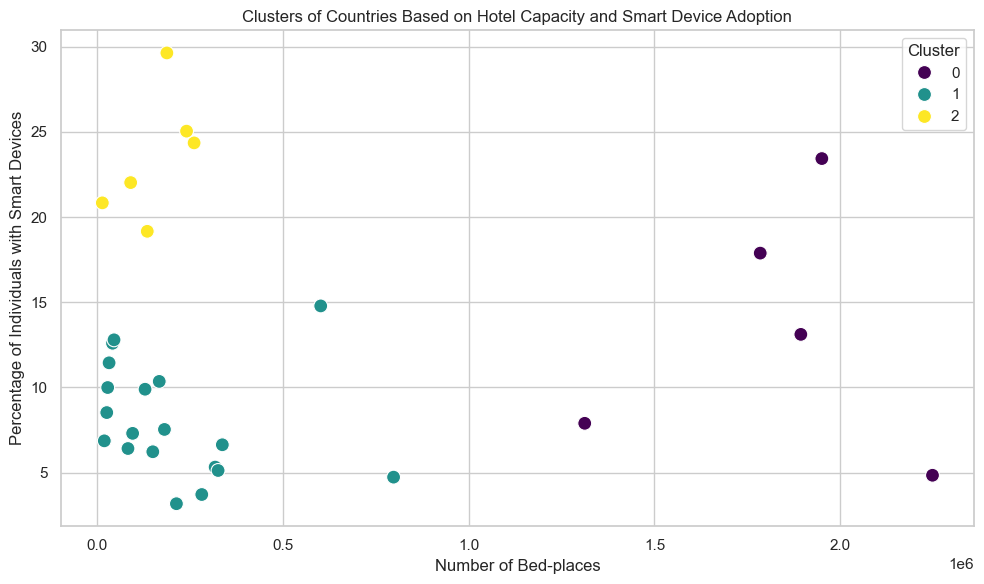

         Number of Bed-places  Percentage of individuals  \
Cluster                                                    
0                1.837943e+06                  13.430000   
1                2.040778e+05                   8.071053   
2                1.549887e+05                  23.505000   

         Estimated Market Size  
Cluster                         
0                247351.105460  
1                 15081.386553  
2                 38066.249417  
Cluster 1: ['AT', 'BE', 'BG', 'CY', 'CZ', 'EE', 'EL', 'HR', 'HU', 'IE', 'LT', 'LV', 'MK', 'MT', 'PL', 'PT', 'RO', 'SI', 'SK']
Cluster 0: ['DE', 'ES', 'FR', 'IT', 'UK']
Cluster 2: ['DK', 'FI', 'LU', 'NL', 'NO', 'SE']
         Number of Bed-places  Percentage of individuals  \
Cluster                                                    
0                1.837943e+06                  13.430000   
1                2.040778e+05                   8.071053   
2                1.549887e+05                  23.505000   

         Estimate

In [117]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering
cluster_data = df[['Number of Bed-places', 'Percentage of individuals']]

# Scale the data
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(cluster_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 'auto')  # You can adjust the number of clusters. I checked scattered plot and it had visible 3 clusters
df['Cluster'] = kmeans.fit_predict(scaled_cluster_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number of Bed-places', y='Percentage of individuals',
                hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Countries Based on Hotel Capacity and Smart Device Adoption')
plt.xlabel('Number of Bed-places')
plt.ylabel('Percentage of Individuals with Smart Devices')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Analyze the clusters
cluster_summary = df.groupby('Cluster')[['Number of Bed-places', 'Percentage of individuals', 'Estimated Market Size']].mean()
print(cluster_summary)

# Add cluster strategy
cluster_strategy = {
    0: 'High-High | Primary target for launch | High demand + high readiness for smart products',
    1: 'Low-Low | Avoid in initial phase | Risk of poor product-market fit',
    2: 'Low-High | Secondary target / R&D test bed | Useful for learning, but with limited commercial upside'
}

# Print countries in each cluster
for cluster in df['Cluster'].unique():
    countries = df[df['Cluster'] == cluster]['Country Code'].tolist()
    print(f"Cluster {cluster}: {countries}")

# Add strategy to cluster summary
cluster_summary['Strategy'] = cluster_summary.index.map(cluster_strategy)
print(cluster_summary)



1. High Bed-places – High Smart Adoption
🔑 Ideal Launch Markets

These countries have large hotel infrastructure and high smart tech adoption.
['DE', 'ES', 'FR', 'IT', 'UK']
Likely early adopters of smart hotel devices.

Good opportunity for high volume and ease of integration (guests already comfortable with smart devices).

📌 Action: Prioritize these markets for initial launch or pilot program.

2. Low Bed-places – Low Smart Adoption
⚠️ Least Ready Markets

Small tourism/hospitality sector and low tech engagement.
['AT', 'BE', 'BG', 'CY', 'CZ', 'EE', 'EL', 'HR', 'HU', 'IE', 'LT', 'LV', 'MK', 'MT', 'PL', 'PT', 'RO', 'SI', 'SK']
Launching here risks low adoption and low sales volume.

📌 Action: De-prioritize; revisit after gaining traction elsewhere.

3. Low Bed-places – High Smart Adoption
💡 Niche but Smart

Tech-savvy populations but small hotel industry.
['DK', 'FI', 'LU', 'NL', 'NO', 'SE']
Good for testing tech usability and reception, even if not scalable.

Might work well for boutique or luxury hotels aiming for premium guest experiences.

📌 Action: Consider for controlled experiments or premium positioning.

/var/folders/q0/31_jtg7s37n_nss3j1nn4_k00000gn/T/ipykernel_14146/1013186681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted.head(5), x='Country Code', y='Estimated Market Size', palette='viridis')


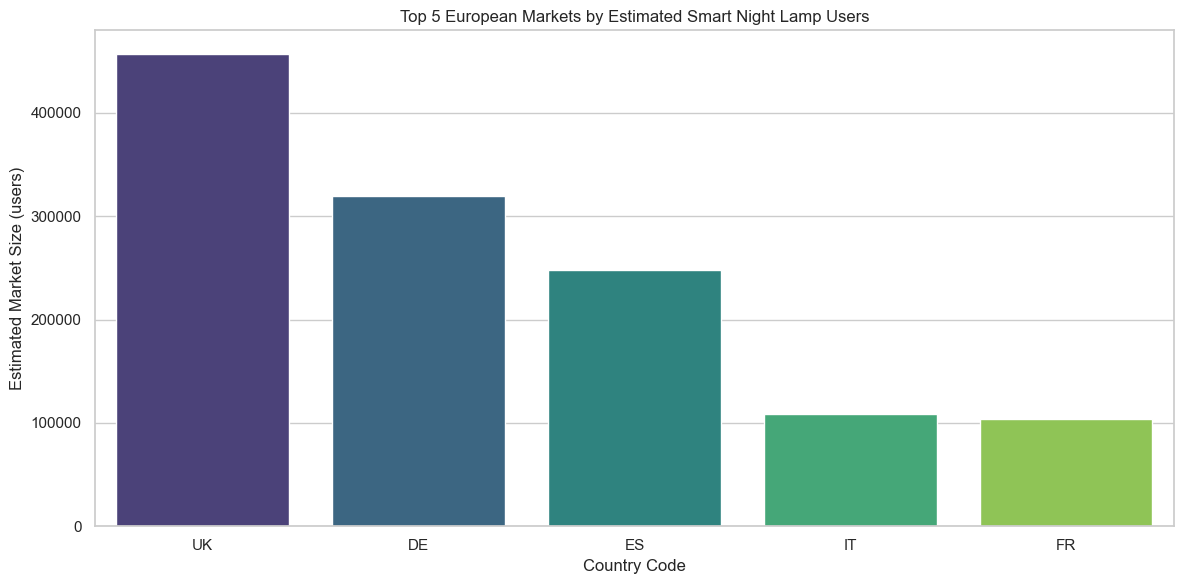

In [109]:
# Plot 1: Bar chart - Top 10 markets
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted.head(5), x='Country Code', y='Estimated Market Size', palette='viridis')
plt.title('Top 5 European Markets by Estimated Smart Night Lamp Users')
plt.ylabel('Estimated Market Size (users)')
plt.xlabel('Country Code')
plt.tight_layout()
plt.show()


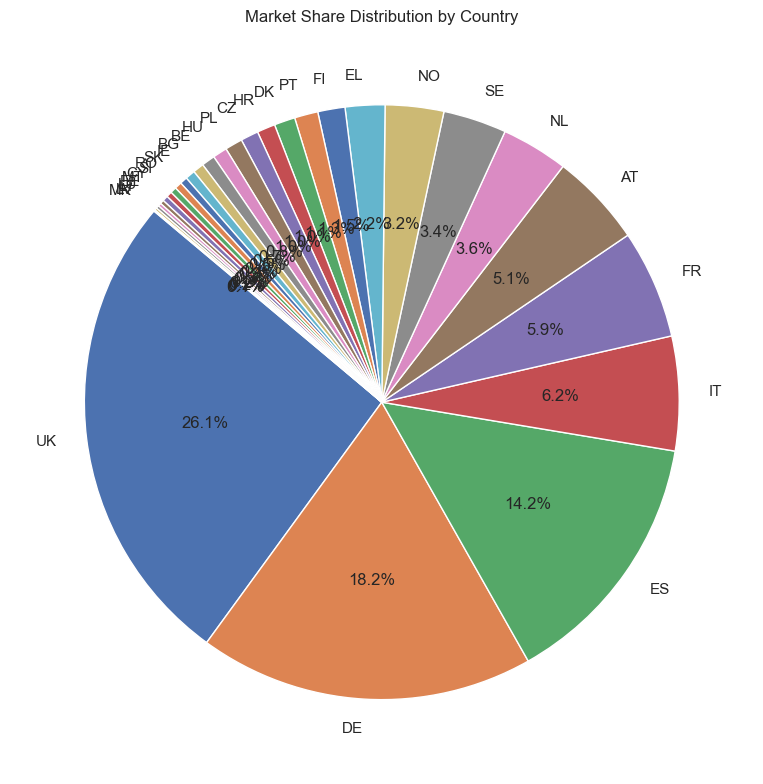

In [ ]:
# Load your CSV
df = geo_merged.copy()  # Update path if needed

# Step 1: Create Estimated Market Size column
df['Estimated Market Size'] = (df['Percentage of individuals'] / 100) * df['Number of Bed-places']

# Step 2: Sort data by Estimated Market Size
df_sorted = df.sort_values(by='Estimated Market Size', ascending=False)

# Add a rank column
df_sorted['Market Size Rank'] = range(1, len(df_sorted) + 1)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Pie chart - Market share distribution
plt.figure(figsize=(8, 8))
plt.pie(df_sorted['Estimated Market Size'], labels=df_sorted['Country Code'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share Distribution by Country')
plt.tight_layout()
plt.show()